# Alois :: Distributions

**Objectives:**
* Plot distributions by Region and Age

In [1]:
import pandas as pd
import numpy as np

import os

* parquet folder for our merged DataFrame

In [2]:
parquet = '/media/tmo/data/work/datasets/02_ST/parquet/'
st_full = parquet + 'st_full'

In [3]:
slides = [
    'B02_D1', 'B02_E1', 'B03_C2', 'B03_D2', 'B04_D1',
    'B04_E1', 'B05_D2', 'B05_E2', 'B06_E1', 'B07_C2',
    'N02_C1', 'N02_D1', 'N03_C2', 'N03_D2', 'N04_D1',
    'N04_E1', 'N05_C2', 'N05_D2', 'N06_D2', 'N07_C1']

In [4]:
# SLIDE_META_COLUMNS = ['Sample id', 'GenotypeShort', 'Age (day)', 'Age (month)']
SLIDE_META_COLUMNS = ['sampleID', 'GT', 'age_days', 'age_months']

In [5]:
SPOT_META_COLUMNS = ['sampleID', 'AB1_StdDev_Yen', 'Region_predict',
                     'microglia', 'neuron', 'astrocyte', 'oligodendrocyte', 'endothelial', 'interneuron']

In [6]:
GT = 'GT'
YEN = 'AB1_StdDev_Yen'
REGION = 'Region_predict'
ASTRO = 'astrocyte'
AGE = 'age'
DAYS = 'age_days'
MONTHS = 'age_months'
SPOT_UID = 'spot_UID'

---

# Analysis

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style="whitegrid")

In [8]:
%%time
full = pd.read_parquet(st_full)

CPU times: user 8.09 s, sys: 14.4 s, total: 22.4 s
Wall time: 9.19 s


In [9]:
full.shape

(10327, 46756)

In [10]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10327 entries, 0 to 477
Columns: 46756 entries, -343C11.2 to age_months
dtypes: float32(46454), float64(234), int64(65), object(3)
memory usage: 1.8+ GB


* condense age into two classes: young and old

In [11]:
full['age']=np.where(full['age_months']<10, 'young', 'old')

In [13]:
full['age'].value_counts()

young    5307
old      5020
Name: age, dtype: int64

In [14]:
meta_df = full[SLIDE_META_COLUMNS + SPOT_META_COLUMNS + ['age']]
meta_df.head()

,sampleID,GT,age_days,age_months,sampleID,AB1_StdDev_Yen,Region_predict,microglia,neuron,astrocyte,oligodendrocyte,endothelial,interneuron,age
0,B02_D1,WT,107,4,B02_D1,0.0,AT_OLF,0.119315,0.032347,0.084108,-0.071774,0.015555,-0.098903,young
1,B02_D1,WT,107,4,B02_D1,0.0,AT_HY,0.075579,0.132762,0.076381,-0.016686,0.091661,0.286832,young
2,B02_D1,WT,107,4,B02_D1,0.0,AT_HY,0.066301,-0.015303,0.186733,-0.021227,0.063068,0.085310,young
3,B02_D1,WT,107,4,B02_D1,0.0,unknown,0.183595,0.060572,0.191472,0.075224,0.231584,0.311879,young
4,B02_D1,WT,107,4,B02_D1,0.0,AT_OLF,-0.050931,0.038941,0.116606,-0.091150,0.040463,-0.001418,young


## **AB1 StdDev Yen**

* only KI samples have a plaque vicinity > 0

In [15]:
meta_df[meta_df[YEN] > 0.0]['GT'].value_counts()

KI    5009
Name: GT, dtype: int64

In [16]:
meta_df['GT'].value_counts()

WT    5318
KI    5009
Name: GT, dtype: int64

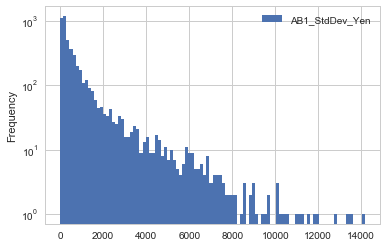

In [17]:
meta_df[meta_df[YEN] > 0.0][[YEN]].plot.hist(bins=100, 
                                             log=True)
plt.show()

In [18]:
meta_df['age_months'].value_counts()

4     4292
18    4085
6     1015
12     935
Name: age_months, dtype: int64

In [19]:
regions = meta_df[REGION].unique()
regions.sort()
regions

array(['AT_AUD', 'AT_CNU', 'AT_CTXsp', 'AT_ECT', 'AT_ENTI', 'AT_FB',
       'AT_FB_HY', 'AT_FB_TH', 'AT_HPd_CA1_slm', 'AT_HPd_CA1_so',
       'AT_HPd_CA1_sr', 'AT_HPd_CA2_slm', 'AT_HPd_CA2_so', 'AT_HPd_CA2_sr',
       'AT_HPd_CA3_slm', 'AT_HPd_CA3_slu', 'AT_HPd_CA3_so',
       'AT_HPd_CA3_sr', 'AT_HPd_DG_mo', 'AT_HPd_DG_po', 'AT_HPs_CA1_sp',
       'AT_HPs_CA2_sp', 'AT_HPs_CA3_sp', 'AT_HPs_DG_sp', 'AT_HY', 'AT_MB',
       'AT_OLF', 'AT_PERI', 'AT_PTL', 'AT_RSP', 'AT_SSp', 'AT_TE', 'AT_TH',
       'AT_VL', 'unknown'], dtype=object)

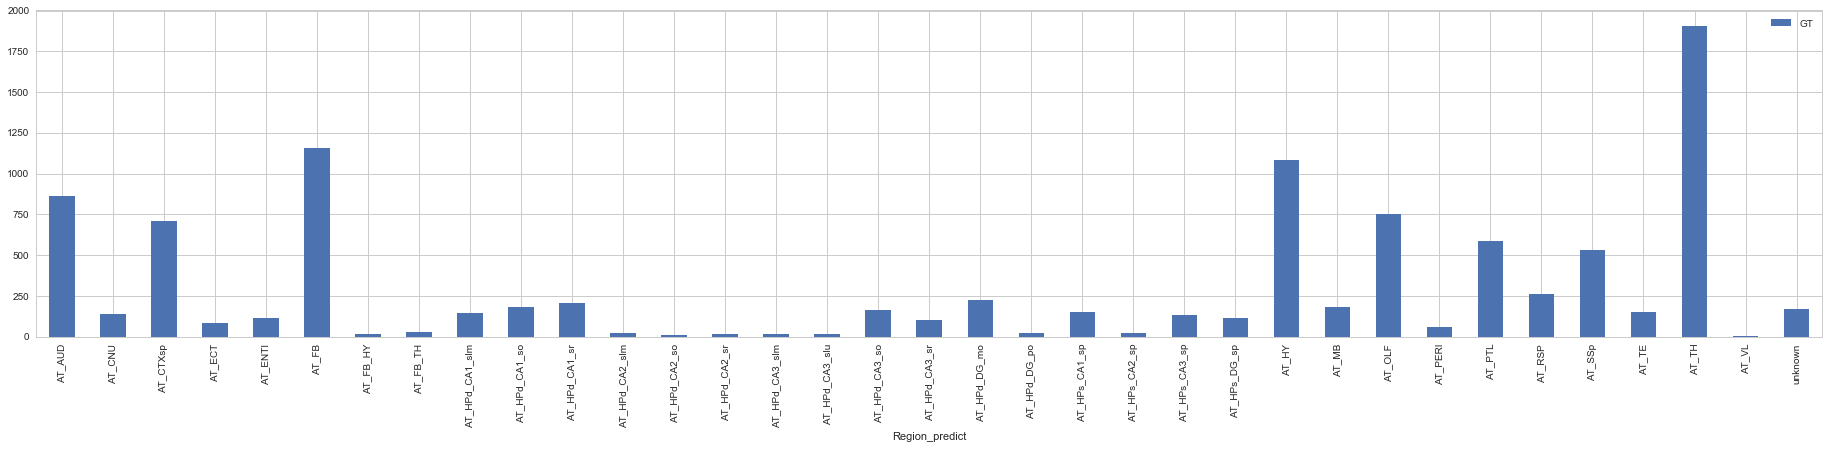

In [20]:
meta_df[[REGION, GT]].groupby(REGION).count().plot(kind='bar', figsize=(32,6))
plt.show()

## **Plaque pixel intensity StdDev Yen**

### **By age (months)**

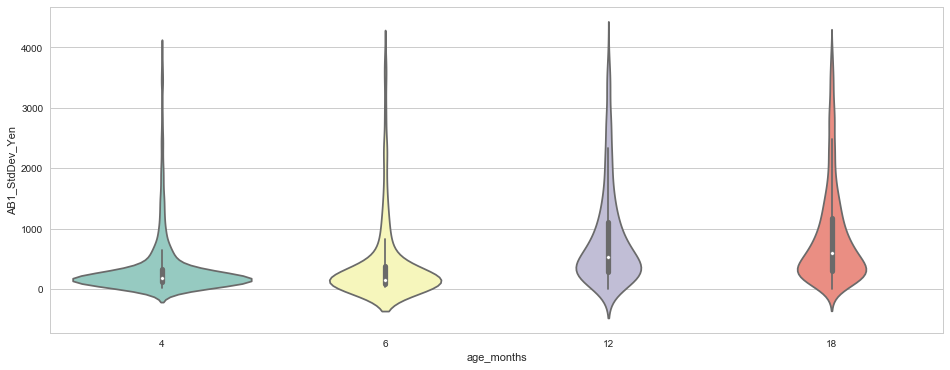

In [21]:
fig, ax = plt.subplots(figsize=(16, 6))

# ax.set(yscale="log")
data = meta_df[(meta_df['GT'] == 'KI') & (meta_df[YEN] < 4000)][[YEN, MONTHS]]
sns.violinplot(data=data, x='age_months', y=YEN, palette="Set3")

plt.show()

### **By Region / Age**

* https://stackoverflow.com/questions/40514921/ordering-boxplot-x-axis-in-seaborn


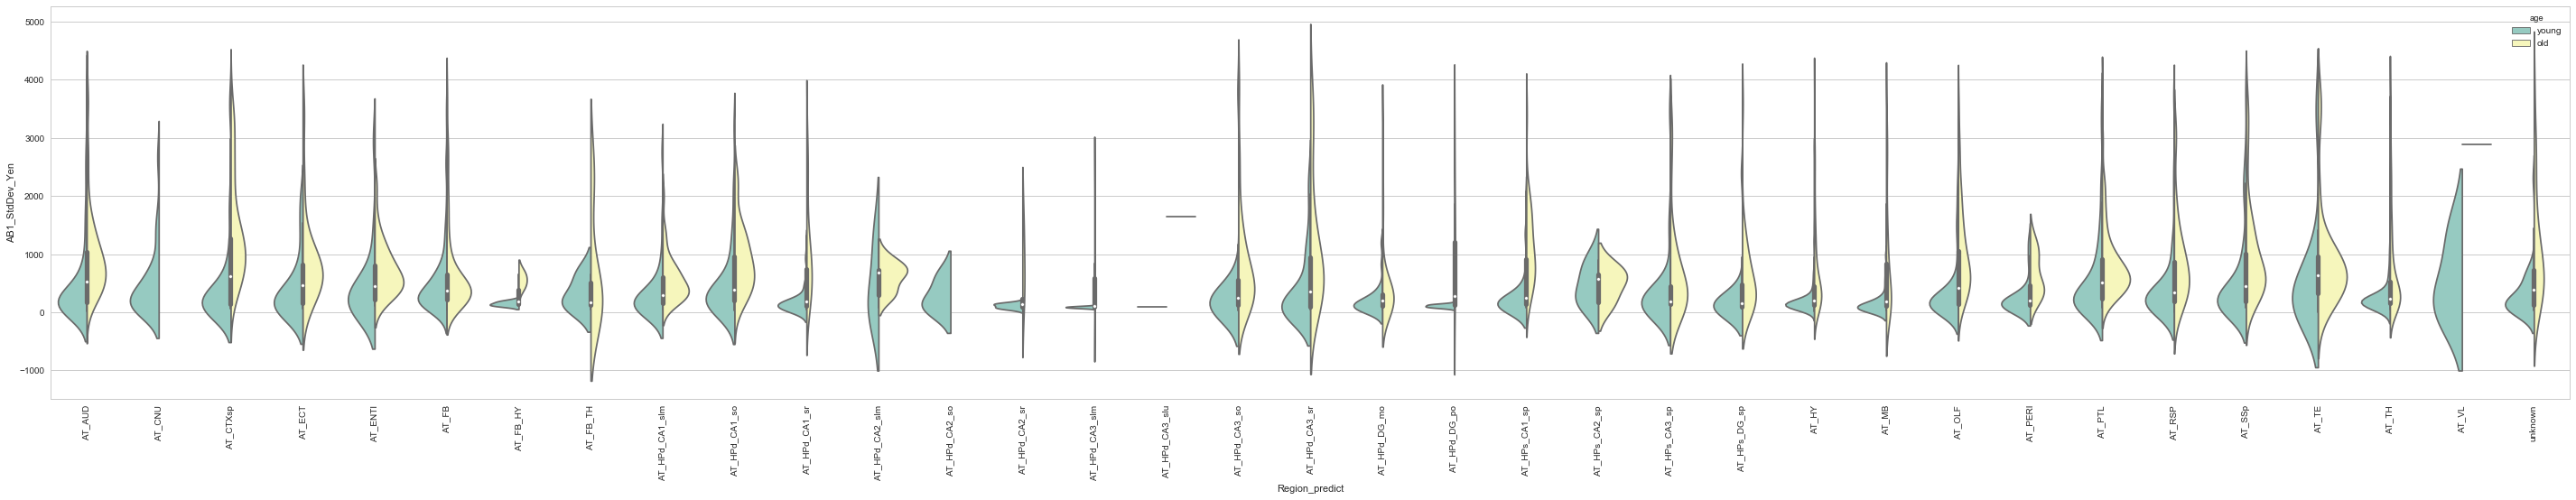

In [27]:
fig, ax = plt.subplots(figsize=(50, 8))

data = meta_df[(meta_df['GT'] == 'KI') & (meta_df[YEN] < 4000)][[YEN, MONTHS, REGION, AGE]]
g = sns.violinplot(data=data, x=REGION, y=YEN, hue=AGE, palette="Set3", order=regions, split=True)
g.set_xticklabels(rotation=90, labels=regions)

plt.show()

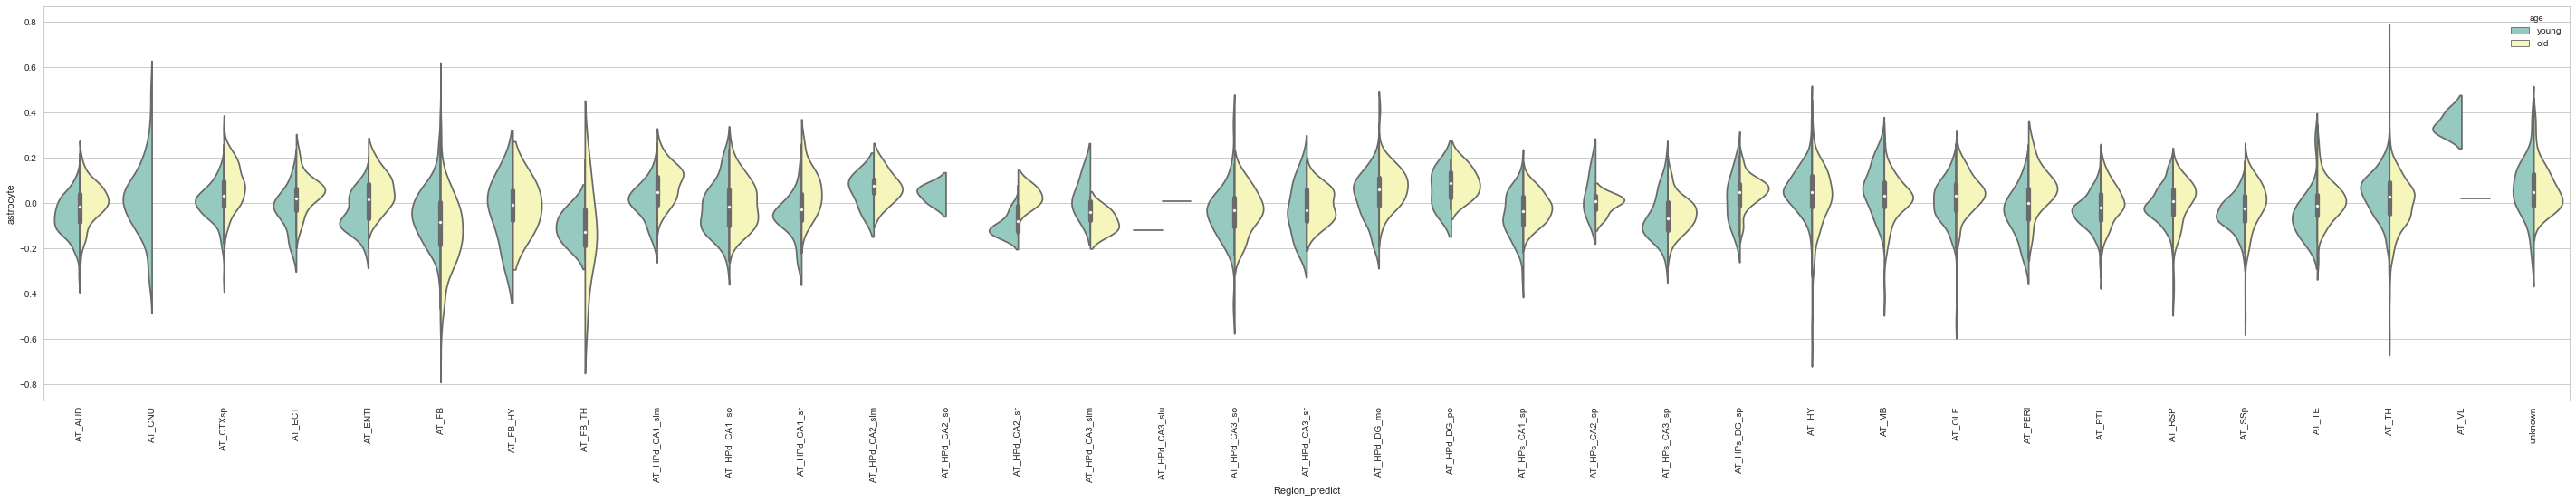

In [28]:
fig, ax = plt.subplots(figsize=(50, 8))

data = meta_df[(meta_df['GT'] == 'KI')][[ASTRO, MONTHS, REGION, AGE]]
g = sns.violinplot(data=data, x=REGION, y=ASTRO, hue=AGE, palette="Set3", order=regions, split=True)
g.set_xticklabels(rotation=90, labels=regions)

plt.show()

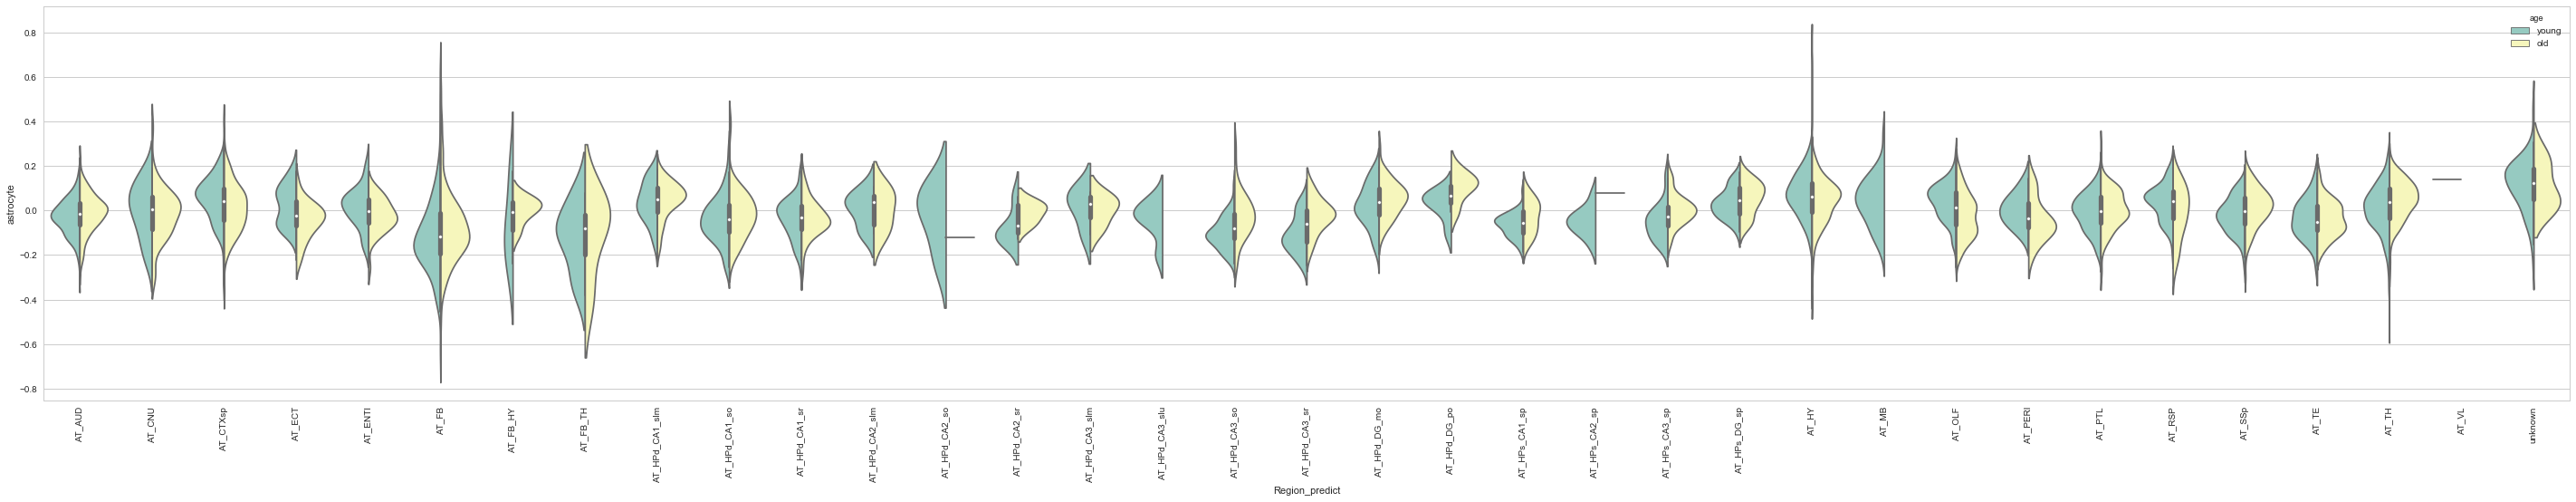

In [29]:
fig, ax = plt.subplots(figsize=(50, 8))

data = meta_df[(meta_df['GT'] == 'WT')][[ASTRO, MONTHS, REGION, AGE]]
g = sns.violinplot(data=data, x=REGION, y=ASTRO, hue=AGE, palette="Set3", order=regions, split=True)
g.set_xticklabels(rotation=90, labels=regions)

plt.show()